En esta clase vamos a trabajar con un modelo **preentrenado** de visión por computadora para hacer **clasificación de imágenes reales**.

Usaremos `torchvision` para cargar un modelo **ResNet18**, que ya fue entrenado con millones de imágenes en ImageNet. Esto nos permite aplicarlo directamente sin tener que entrenar nada.

---


# Clasificación de Imágenes con Redes Neuronales Preentrenadas
## Una introducción práctica a la Visión por Computadora

### Introducción
En este notebook aprenderemos sobre:
- Qué son los modelos preentrenados y por qué son útiles
- Cómo funciona ResNet18, una arquitectura revolucionaria en visión por computadora
- El proceso completo de clasificación de imágenes en la práctica
- Técnicas de preprocesamiento de imágenes para redes neuronales

### ¿Qué es ResNet?
ResNet (Residual Network) es una arquitectura de red neuronal que revolucionó el campo de la visión por computadora en 2015:
- Permite entrenar redes muy profundas (18-152 capas) de manera efectiva
- Utiliza "conexiones residuales" para evitar el problema de la degradación del gradiente
- Logró resultados estado del arte en múltiples tareas de visión

### Preparación del Entorno
Primero instalamos las bibliotecas necesarias:
- torch: Framework de deep learning
- torchvision: Herramientas específicas para visión por computadora
- matplotlib: Visualización de imágenes y resultados

In [ ]:
# Instalamos librerías necesarias
!pip install -q torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.2 MB/s eta 0:00:00


### 1. Cargando el Modelo Preentrenado

Vamos a usar **ResNet18**, un modelo convolucional profundo entrenado con el dataset ImageNet (1000 clases).

En esta sección:
- Importamos las bibliotecas necesarias
- Cargamos ResNet18 preentrenado en ImageNet
- Configuramos el modelo en modo evaluación


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Cargar modelo preentrenado
modelo = models.resnet18(pretrained=True)
modelo.eval()  # modo evaluación (no entrenamiento)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 2. Preprocesamiento de Imágenes

Para que una red neuronal pueda procesar imágenes, necesitamos:
1. Redimensionar a un tamaño fijo (224x224 pixels)
2. Convertir la imagen a tensor (formato que entiende PyTorch)
3. Normalizar los valores según el estándar de ImageNet


In [ ]:
# Definimos pipeline de preprocesamiento
preprocesado = transforms.Compose([
    transforms.Resize(256),      # Redimensiona manteniendo proporción
    transforms.CenterCrop(224),  # Recorta el centro a 224x224
    transforms.ToTensor(),       # Convierte a tensor y escala a [0,1]
    transforms.Normalize(        # Normaliza según estadísticas de ImageNet
        mean=[0.485, 0.456, 0.406],  # Media por canal RGB
        std=[0.229, 0.224, 0.225]    # Desviación estándar por canal
    )
])

### 3. Carga y Visualización de Imágenes

Demostración práctica usando una imagen de internet:
- Cargamos una imagen desde URL
- Visualizamos la imagen original
- Aplicamos el preprocesamiento


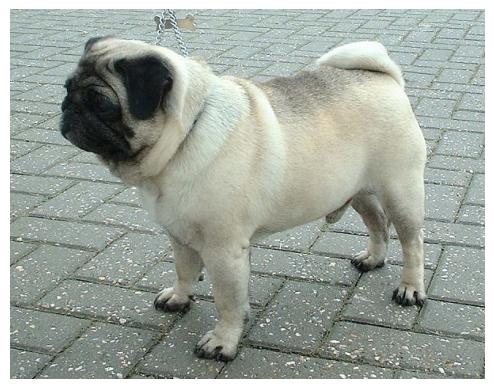

In [ ]:
# Cargar imagen desde URL
url = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg"  # Imagen de un perro
imagen = Image.open(requests.get(url, stream=True).raw)

# Mostrar imagen
plt.imshow(imagen)
plt.axis("off")
plt.show()

# Preprocesar
input_tensor = preprocesado(imagen).unsqueeze(0)  # Agrega batch dimension

### 4. Predicción y Análisis de Resultados

Ahora:
- Pasamos la imagen por el modelo
- Interpretamos las probabilidades
- Mostramos la predicción final



In [ ]:
# Obtener predicciones
with torch.no_grad():
    output = modelo(input_tensor)

# Descargamos los nombres de las clases de ImageNet
import json
labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = requests.get(labels_url).text.split("\n")

# Obtener la clase con mayor probabilidad
probabilidades = torch.nn.functional.softmax(output[0], dim=0)
indice = torch.argmax(probabilidades).item()
print(f"Predicción: {labels[indice]} ({probabilidades[indice]*100:.2f}%)")

Predicción: pug (99.63%)


### 5. Actividad Práctica

Tu turno. Poné a prueba el modelo:

1. Elegi una imagen de internet que te interese analizar
2. Modifica la URL en el código anterior
3. Ejecuta el análisis y reflexiona:
   - ¿La predicción fue correcta?
   - ¿Qué tan confiado estaba el modelo?
   - ¿Qué factores pudieron afectar el resultado?

Sugerencias de fuentes de imágenes:

- Wikipedia Commons
- Unsplash.com (fotos de alta calidad)
- Flickr Creative Commons
- Redes sociales públicas

### Conclusiones y Reflexiones

- Los modelos preentrenados nos permiten aprovechar el aprendizaje previo
- El preprocesamiento es crucial para el éxito del modelo
- Las redes neuronales pueden fallar de maneras interesantes
- La visión por computadora avanzó enormemente, pero aún tiene limitaciones
